# Movie Recommendation System

This project implements a movie recommendation system using text-based similarity measures. It processes a dataset of movies, computes similarity scores using TF-IDF and cosine similarity, and provides recommendations based on movie titles.

## Features

- **Data Processing**: Handles large datasets and preprocesses text data.
- **TF-IDF Vectorization**: Converts text data into numerical features.
- **Cosine Similarity**: Computes similarity scores between movies.
- **Recommendation System**: Provides movie recommendations based on similarity scores.
- **Pickling**: Saves and loads models and similarity matrices for efficient use.


### Library

In [19]:
import ast
import nltk
import pickle
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

In [6]:
### Nltk download

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ali
[nltk_data]     Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
### DATA COLLECTION

In [3]:
df = pd.read_csv('movies_metadata.csv')

In [4]:
df = pd.DataFrame(df)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [19]:
### DEVIED DATA FOR LESS TIME

In [5]:
first_ten = df.head(10000).reset_index(drop=True)
second_ten = df.iloc[10000:20000].reset_index(drop=True)
third_ten = df.iloc[20000:30000].reset_index(drop=True)
forth_ten = df.iloc[30000:40000].reset_index(drop=True)

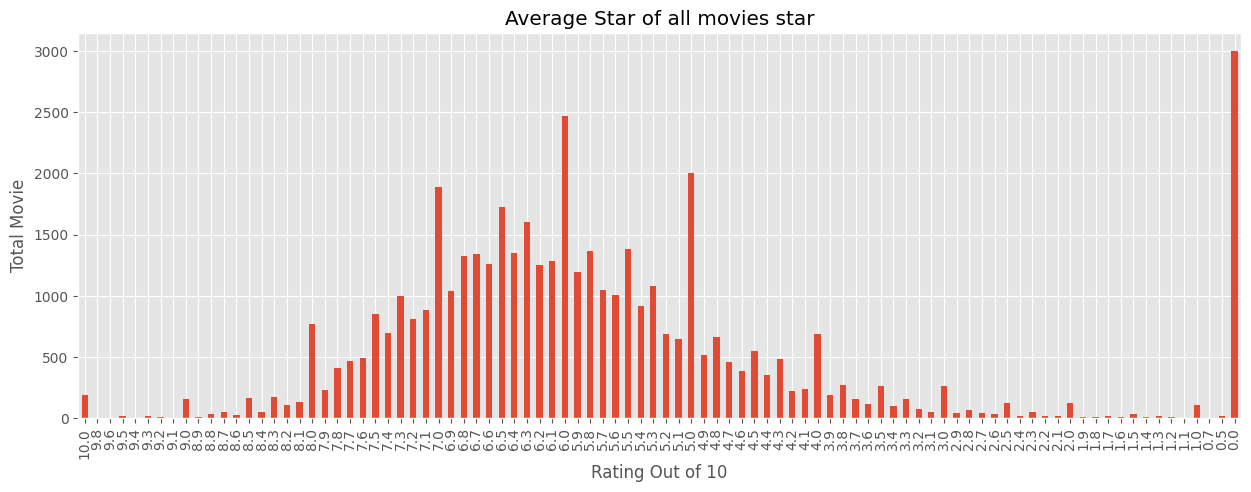

In [20]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
df['vote_average'].value_counts().sort_index(ascending=False).plot(kind='bar',title='Average Star of all movies star')
plt.xlabel('Rating Out of 10')
plt.ylabel('Total Movie')
plt.show()

In [6]:
df['genres'].head(2)
## Make use full

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
Name: genres, dtype: object

In [7]:
## FROM genres JUST GET NAME 

def extract_genres(df, column_name):
    def get_genre_names(genres_str):
        genres_list = ast.literal_eval(genres_str)
        return [item['name'] for item in genres_list]

    df['genre_names'] = df[column_name].apply(get_genre_names)
    return df

In [8]:
first_ten = extract_genres(first_ten, 'genres')
second_ten = extract_genres(second_ten, 'genres')
third_ten = extract_genres(third_ten, 'genres')
forth_ten = extract_genres(forth_ten, 'genres')

In [9]:
first_ten['text'] = first_ten['title'] + " " + first_ten['overview'] + " " + first_ten['genre_names'].apply(lambda x: ' '.join(x))
second_ten['text'] = second_ten['title'] + " " + second_ten['overview'] + " " + second_ten['genre_names'].apply(lambda x: ' '.join(x))
third_ten['text'] = third_ten['title'] + " " + third_ten['overview'] + " " + third_ten['genre_names'].apply(lambda x: ' '.join(x))
forth_ten['text'] = forth_ten['title'] + " " + forth_ten['overview'] + " " + forth_ten['genre_names'].apply(lambda x: ' '.join(x))

In [10]:
### REMOVE EXTRAE WORDS

In [11]:
first_ten['text'] = first_ten['text'].str.lower().replace(r'[^a-zA-Z0-9]','').replace(r'\n',' ',regex=True)
second_ten['text'] = second_ten['text'].str.lower().replace(r'[^a-zA-Z0-9]','').replace(r'\n',' ',regex=True)
third_ten['text'] = third_ten['text'].str.lower().replace(r'[^a-zA-Z0-9]','').replace(r'\n',' ',regex=True)
forth_ten['text'] = forth_ten['text'].str.lower().replace(r'[^a-zA-Z0-9]','').replace(r'\n',' ',regex=True)

In [12]:
ps = PorterStemmer()
steamin =[]
def stem(content):
    token = nltk.word_tokenize(content)
    steamin = [ps.stem(word) for word in token]
    return " ".join(steamin)

In [13]:
first_ten['text'] = first_ten['text'].apply(lambda x: stem(str(x)))
second_ten['text'] = second_ten['text'].apply(lambda x: stem(str(x)))
third_ten['text'] = third_ten['text'].apply(lambda x: stem(str(x)))
forth_ten['text'] = forth_ten['text'].apply(lambda x: stem(str(x)))

In [14]:
first_ten['text'].head()

0    toy stori led by woodi , andi 's toy live happ...
1    jumanji when sibl judi and peter discov an enc...
2    grumpier old men a famili wed reignit the anci...
3    wait to exhal cheat on , mistreat and step on ...
4    father of the bride part ii just when georg ba...
Name: text, dtype: object

### Convert Data into Vector 

In [15]:
vector = TfidfVectorizer(stop_words='english')
matrix1 = vector.fit_transform(first_ten['text'])
matrix2 = vector.fit_transform(second_ten['text'])
matrix3= vector.fit_transform(third_ten['text'])
matrix4 = vector.fit_transform(forth_ten['text'])

In [16]:
### cosine_similarity IS MACHINE LEARNING ALGO THATS FIND SIMLARLTY

In [17]:
simlarlity = cosine_similarity(matrix1,matrix1)
simlarlity1 = cosine_similarity(matrix2,matrix2)
simlarlity2 = cosine_similarity(matrix3,matrix3)
simlarlity4 = cosine_similarity(matrix4,matrix4)

In [20]:
# Combine datasets for the indices and text
combined_data = pd.concat([first_ten, second_ten, third_ten, forth_ten], ignore_index=True)
indices = pd.Series(combined_data.index, index=combined_data['title']).drop_duplicates()
with open('indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

In [38]:

# Normalize and average similarity matrices
def normalize_similarity(similarity_matrix):
    min_sim = np.min(similarity_matrix)
    max_sim = np.max(similarity_matrix)
    return (similarity_matrix - min_sim) / (max_sim - min_sim)

# Normalize each similarity matrix
similarity = normalize_similarity(simlarlity)
similarity1 = normalize_similarity(simlarlity1)
similarity2 = normalize_similarity(simlarlity2)
similarity4 = normalize_similarity(simlarlity4)

# Average the normalized similarities
average_similarity = (similarity + similarity1 + similarity2 + similarity4) / 4

In [39]:
### RECOMENDE FUNCTION 

In [41]:
# Function to recommend movies based on combined similarity
def recommend_from_combined_similarity(title, all_data, indices, average_similarity):
    if title not in indices:
        return "Movie not found in the dataset."

    idx = indices[title]
    sim_scores = list(enumerate(average_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return all_data[['title', 'overview', 'genre_names']].iloc[movie_indices]

# Example usage
recommendations = recommend_from_combined_similarity('The Matrix', combined_data, indices, average_similarity)
print(recommendations)

                               title  \
167                          Hackers   
6515                        Commando   
9372                   The Animatrix   
9377                           11:14   
3256                Destination Moon   
5788                    Best Friends   
2761                           Tommy   
6221             The Matrix Reloaded   
1931  The Computer Wore Tennis Shoes   
5396                          S1m0ne   

                                               overview  \
167   Along with his new friends, a teenager who was...   
6515  John Matrix, the former leader of a special co...   
9372  Straight from the creators of the groundbreaki...   
9377  Tells the seemingly random yet vitally connect...   
3256  Postulates the first manned trip to the moon, ...   
5788  When a professional couple who have lived &amp...   
2761  A psychosomatically deaf, dumb and blind boy b...   
6221  Six months after the events depicted in The Ma...   
1931  Some college students 

In [43]:
import pickle

# Save the average similarity matrix
with open('average_similarity.pkl', 'wb') as f:
    pickle.dump(average_similarity, f)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vector, f)

# Save the combined data DataFrame
combined_data.to_pickle('combined_data.pkl')


In [50]:
title = recommendations['title'].reset_index(drop=True)
overview =  recommendations['overview'].reset_index(drop=True)
genre_names =  recommendations['genre_names'].reset_index(drop=True)

In [54]:
for i in range(0,10):
    print(f'Title : {title[i]} Overview : {overview[i]} generues : {genre_names[i]}')

Title : Hackers Overview : Along with his new friends, a teenager who was arrested by the US Secret Service and banned from using a computer for writing a computer virus discovers a plot by a nefarious hacker, but they must use their computer skills to find the evidence while being pursued by the Secret Service and the evil computer genius behind the virus. generues : ['Action', 'Crime', 'Thriller', 'Drama']
Title : Commando Overview : John Matrix, the former leader of a special commando strike force that always got the toughest jobs done, is forced back into action when his young daughter is kidnapped. To find her, Matrix has to fight his way through an array of punks, killers, one of his former commandos, and a fully equipped private army. With the help of a feisty stewardess and an old friend, Matrix has only a few hours to overcome his greatest challenge: finding his daughter before she's killed. generues : ['Action', 'Adventure', 'Thriller']
Title : The Animatrix Overview : Straig